In [10]:
import numpy as np
import pandas as pd
import scipy as sp
import collections
from matplotlib import pyplot as plt

%matplotlib inline
import seaborn

In [5]:
dataset = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "ANSI", low_memory = False)

In [8]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [16]:
print(dataset.info(memory_usage = 'deep', verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
eventid               int64
iyear                 int64
imonth                int64
iday                  int64
approxdate            object
extended              int64
resolution            object
country               int64
country_txt           object
region                int64
region_txt            object
provstate             object
city                  object
latitude              float64
longitude             float64
specificity           float64
vicinity              int64
location              object
summary               object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr             float64
alternative           float64
alternative_txt       object
multiple              float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt       object
attacktype2           floa

In [26]:
dataset.select_dtypes(include=['int64']).describe()

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,...,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,0.068297,0.988530,0.993093,...,0.036507,3.247547,8.439719,0.002950,6.447325,-0.544556,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.284553,0.106483,0.082823,...,0.187549,1.915772,6.653838,0.054234,2.173435,3.122889,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-9.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,3.000000,0.000000,5.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,4.000000,0.000000,6.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,14.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,...,1.000000,9.000000,22.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
integer_columns = dataset.select_dtypes(include=['int64']).apply(pd.to_numeric, downcast = 'unsigned')

In [28]:

integer_columns.info(memory_usage='deep', verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
eventid        181691 non-null uint64
iyear          181691 non-null uint16
imonth         181691 non-null uint8
iday           181691 non-null uint8
extended       181691 non-null uint8
country        181691 non-null uint16
region         181691 non-null uint8
vicinity       181691 non-null int64
crit1          181691 non-null uint8
crit2          181691 non-null uint8
crit3          181691 non-null uint8
success        181691 non-null uint8
suicide        181691 non-null uint8
attacktype1    181691 non-null uint8
targtype1      181691 non-null uint8
individual     181691 non-null uint8
weaptype1      181691 non-null uint8
property       181691 non-null int64
INT_LOG        181691 non-null int64
INT_IDEO       181691 non-null int64
INT_MISC       181691 non-null int64
INT_ANY        181691 non-null int64
dtypes: int64(6), uint16(2), uint64(1), uint8(13)
memory usage: 12.6 MB


In [32]:
float_columns = dataset.select_dtypes(include=['float64']).apply(pd.to_numeric, downcast = 'unsigned')
float_columns.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 55 columns):
latitude          177135 non-null float64
longitude         177134 non-null float64
specificity       181685 non-null float64
doubtterr         181690 non-null float64
alternative       29011 non-null float64
multiple          181690 non-null float64
attacktype2       6314 non-null float64
attacktype3       428 non-null float64
targsubtype1      171318 non-null float64
natlty1           180132 non-null float64
targtype2         11144 non-null float64
targsubtype2      10685 non-null float64
natlty2           10828 non-null float64
targtype3         1176 non-null float64
targsubtype3      1097 non-null float64
natlty3           1147 non-null float64
guncertain1       181311 non-null float64
guncertain2       1955 non-null float64
guncertain3       320 non-null float64
nperps            110576 non-null float64
nperpcap          112202 non-null float64
claimed           115571 no

In [38]:
gl_obj = dataset.select_dtypes(include = ["object"])
gl_obj.describe()

,approxdate,resolution,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,...,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
count,9239,2220,181691,181691,181270,181257,55495,115562,29011,181691,...,324,3305,514,10991,28289,115500,76933,43516,181691,25038
unique,2244,1859,205,12,2855,36674,44109,112492,5,9,...,143,217,387,7,15429,83988,62263,36090,26,14306
top,"September 18-24, 2016",8/4/1998,Iraq,Middle East & North Africa,Baghdad,Unknown,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",Insurgency/Guerilla Action,Bombing/Explosion,...,Unknown,Colombia,0,Unknown,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,"201612010023, 201612010024, 201612010025, 2016..."
freq,101,18,24636,50474,7645,9775,142,100,23410,88255,...,27,687,36,3606,1607,205,134,139,78002,80


In [39]:
gl_obj.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
approxdate            9239 non-null object
resolution            2220 non-null object
country_txt           181691 non-null object
region_txt            181691 non-null object
provstate             181270 non-null object
city                  181257 non-null object
location              55495 non-null object
summary               115562 non-null object
alternative_txt       29011 non-null object
attacktype1_txt       181691 non-null object
attacktype2_txt       6314 non-null object
attacktype3_txt       428 non-null object
targtype1_txt         181691 non-null object
targsubtype1_txt      171318 non-null object
corp1                 139141 non-null object
target1               181055 non-null object
natlty1_txt           180132 non-null object
targtype2_txt         11144 non-null object
targsubtype2_txt      10685 non-null object
corp2                 10117 non-null object
tar

In [40]:
converted_obj = pd.DataFrame()
for col in gl_obj.columns:
    num_unique_values = len(gl_obj[col].unique())
    num_total_values = len(gl_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = gl_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = gl_obj[col]

In [41]:
converted_obj.info(memory_usage = 'deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
approxdate            9239 non-null category
resolution            2220 non-null category
country_txt           181691 non-null category
region_txt            181691 non-null category
provstate             181270 non-null category
city                  181257 non-null category
location              55495 non-null category
summary               115562 non-null object
alternative_txt       29011 non-null category
attacktype1_txt       181691 non-null category
attacktype2_txt       6314 non-null category
attacktype3_txt       428 non-null category
targtype1_txt         181691 non-null category
targsubtype1_txt      171318 non-null category
corp1                 139141 non-null category
target1               181055 non-null category
natlty1_txt           180132 non-null category
targtype2_txt         11144 non-null category
targsubtype2_txt      10685 non-null category
corp2      

In [51]:
category_cols = converted_obj.drop(["approxdate", 'resolution'], axis = 1)

In [54]:
date_columns = dataset[["approxdate", "resolution"]]

In [55]:
reduced_dataset = category_cols.merge([date_columns, integer_columns, float_columns])

TypeError: Can only merge Series or DataFrame objects, a <class 'list'> was passed

In [56]:
type(date_columns)

pandas.core.frame.DataFrame

In [57]:
type(integer_columns)

pandas.core.frame.DataFrame

In [61]:
df_list = [category_cols, integer_columns, float_columns, date_columns]

reduced_dataset = pd.concat(df_list, axis = 1)

In [62]:
reduced_dataset.info(memory_usage='deep', verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
country_txt           category
region_txt            category
provstate             category
city                  category
location              category
summary               object
alternative_txt       category
attacktype1_txt       category
attacktype2_txt       category
attacktype3_txt       category
targtype1_txt         category
targsubtype1_txt      category
corp1                 category
target1               category
natlty1_txt           category
targtype2_txt         category
targsubtype2_txt      category
corp2                 category
target2               category
natlty2_txt           category
targtype3_txt         category
targsubtype3_txt      category
corp3                 category
target3               category
natlty3_txt           category
gname                 category
gsubname              category
gname2                category
gsubname2             

In [63]:
dataset.info(memory_usage='deep', verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
eventid               int64
iyear                 int64
imonth                int64
iday                  int64
approxdate            object
extended              int64
resolution            object
country               int64
country_txt           object
region                int64
region_txt            object
provstate             object
city                  object
latitude              float64
longitude             float64
specificity           float64
vicinity              int64
location              object
summary               object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr             float64
alternative           float64
alternative_txt       object
multiple              float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt       object
attacktype2           floa

In [65]:
reduced_dataset.to_csv("reduced_dataset.csv")

In [66]:
new_dataset = pd.read_csv("reduced_dataset.csv")
new_dataset.info(memory_usage="deep", verbose=True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,10,29,30,31,34,35,40,41,42,43,47,48,49,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 136 columns):
Unnamed: 0            int64
country_txt           object
region_txt            object
provstate             object
city                  object
location              object
summary               object
alternative_txt       object
attacktype1_txt       object
attacktype2_txt       object
attacktype3_txt       object
targtype1_txt         object
targsubtype1_txt      object
corp1                 object
target1               object
natlty1_txt           object
targtype2_txt         object
targsubtype2_txt      object
corp2                 object
target2               object
natlty2_txt           object
targtype3_txt         object
targsubtype3_txt      object
corp3                 object
target3               object
natlty3_txt           object
gname                 object
gsubname              object
gname2                object
gsubname2             object
gname3             

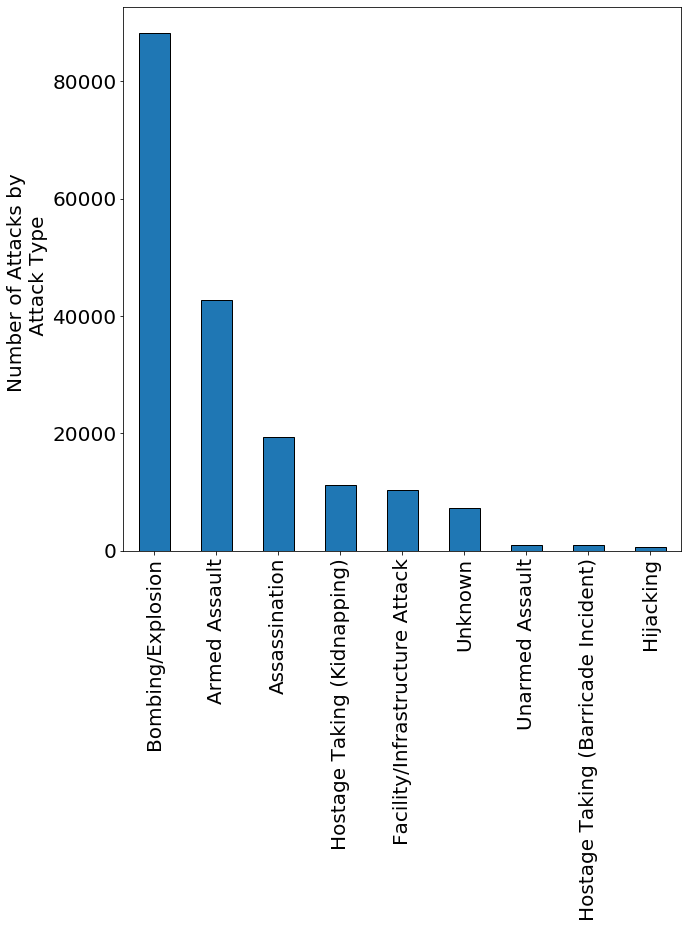

In [104]:
plt.figure(figsize = [10, 10])

dataset["attacktype1_txt"].value_counts().plot(kind = 'bar', rot = 90, fontsize = 20)
plt.ylabel("Number of Attacks by \n Attack Type", fontsize = 20)
plt.rcParams["patch.force_edgecolor"] = True

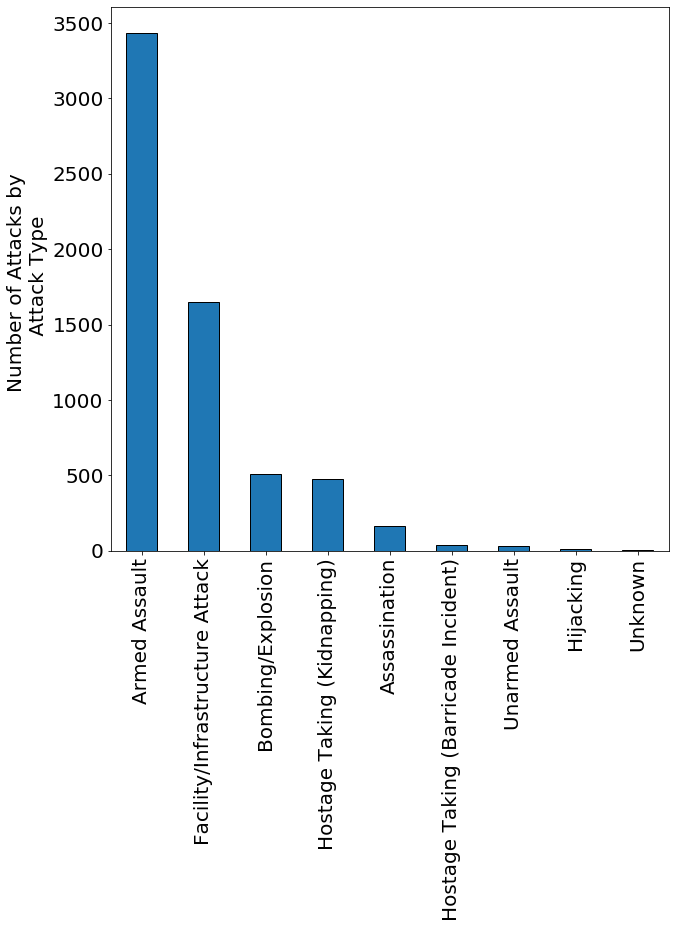

In [105]:
plt.figure(figsize = [10, 10])

dataset["attacktype2_txt"].value_counts().plot(kind = 'bar', rot = 90, fontsize = 20)
plt.ylabel("Number of Attacks by \n Attack Type", fontsize = 20)
plt.rcParams["patch.force_edgecolor"] = True

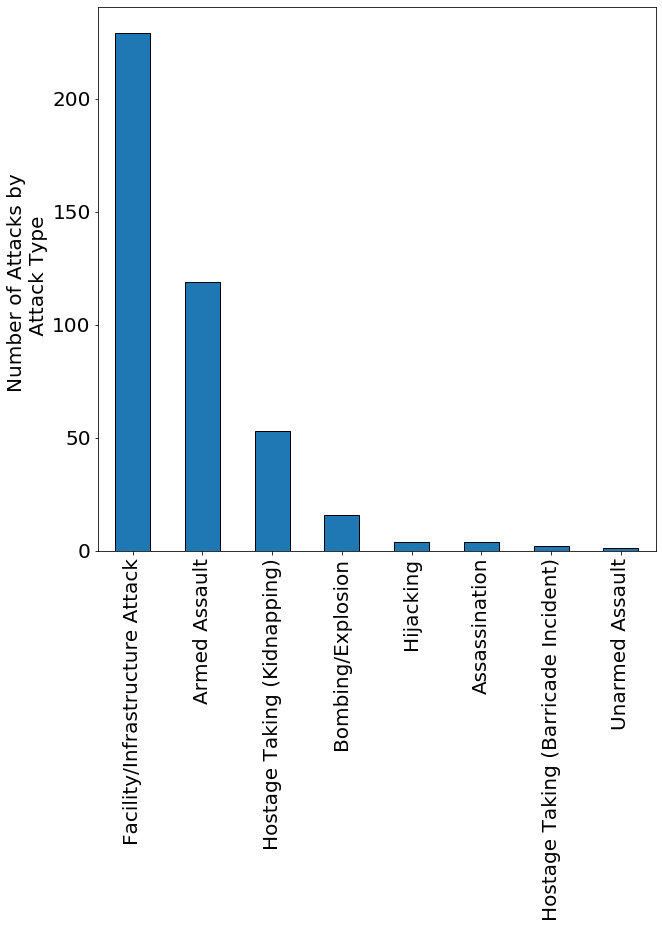

In [106]:
plt.figure(figsize = [10, 10])

dataset["attacktype3_txt"].value_counts().plot(kind = 'bar', rot = 90, fontsize = 20)
plt.ylabel("Number of Attacks by \n Attack Type", fontsize = 20)
plt.rcParams["patch.force_edgecolor"] = True

In [112]:
explosions = reduced_dataset[["attacktype1_txt", "success"]]
explosions.head()

,attacktype1_txt,success
0,Assassination,1
1,Hostage Taking (Kidnapping),1
2,Assassination,1
3,Bombing/Explosion,1
4,Facility/Infrastructure Attack,1


In [113]:
tab = explosions.pivot_table(columns='attacktype1_txt', values = 'success', aggfunc=np.mean)

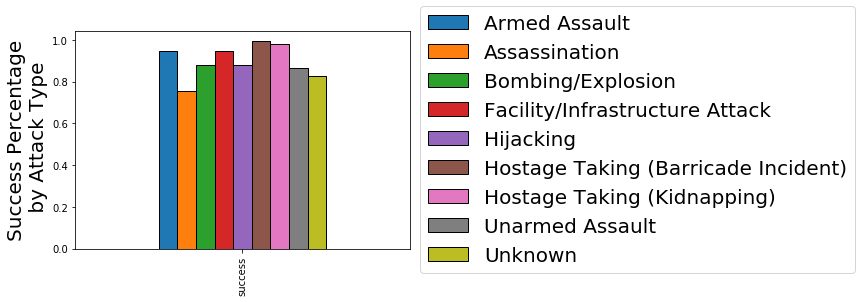

In [121]:
tab.plot(kind = 'bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize = 20)
plt.ylabel("Success Percentage\n by Attack Type", fontsize = 20)
plt.show()